The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [45]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load dataframe
df = pd.read_csv("nobel.csv")

In [46]:
# Check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [47]:
# Preview dataframe first rows
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [48]:
# Find the most commonly awarded gender
top_gender = df["sex"].value_counts().index[0]
print(top_gender)

Male


In [49]:
# Find the most commonly awarded birth country
top_country = df["birth_country"].value_counts().index[0]
print(top_country)

United States of America


In [50]:
# Create the US-born winners column
df["us_born_winners"] = df["birth_country"] == "United States of America"

# Create the decade column 
df["decade"] = (np.floor(df["year"] / 10) * 10).astype(int)

# Find the US-born winners ratio by decade
us_born_ratio_by_decade = df.groupby("decade")["us_born_winners"].mean()

# Identify the decade with the highest ratio of US-born winners
max_decade_usa = us_born_ratio_by_decade.idxmax()

print(max_decade_usa)

2000


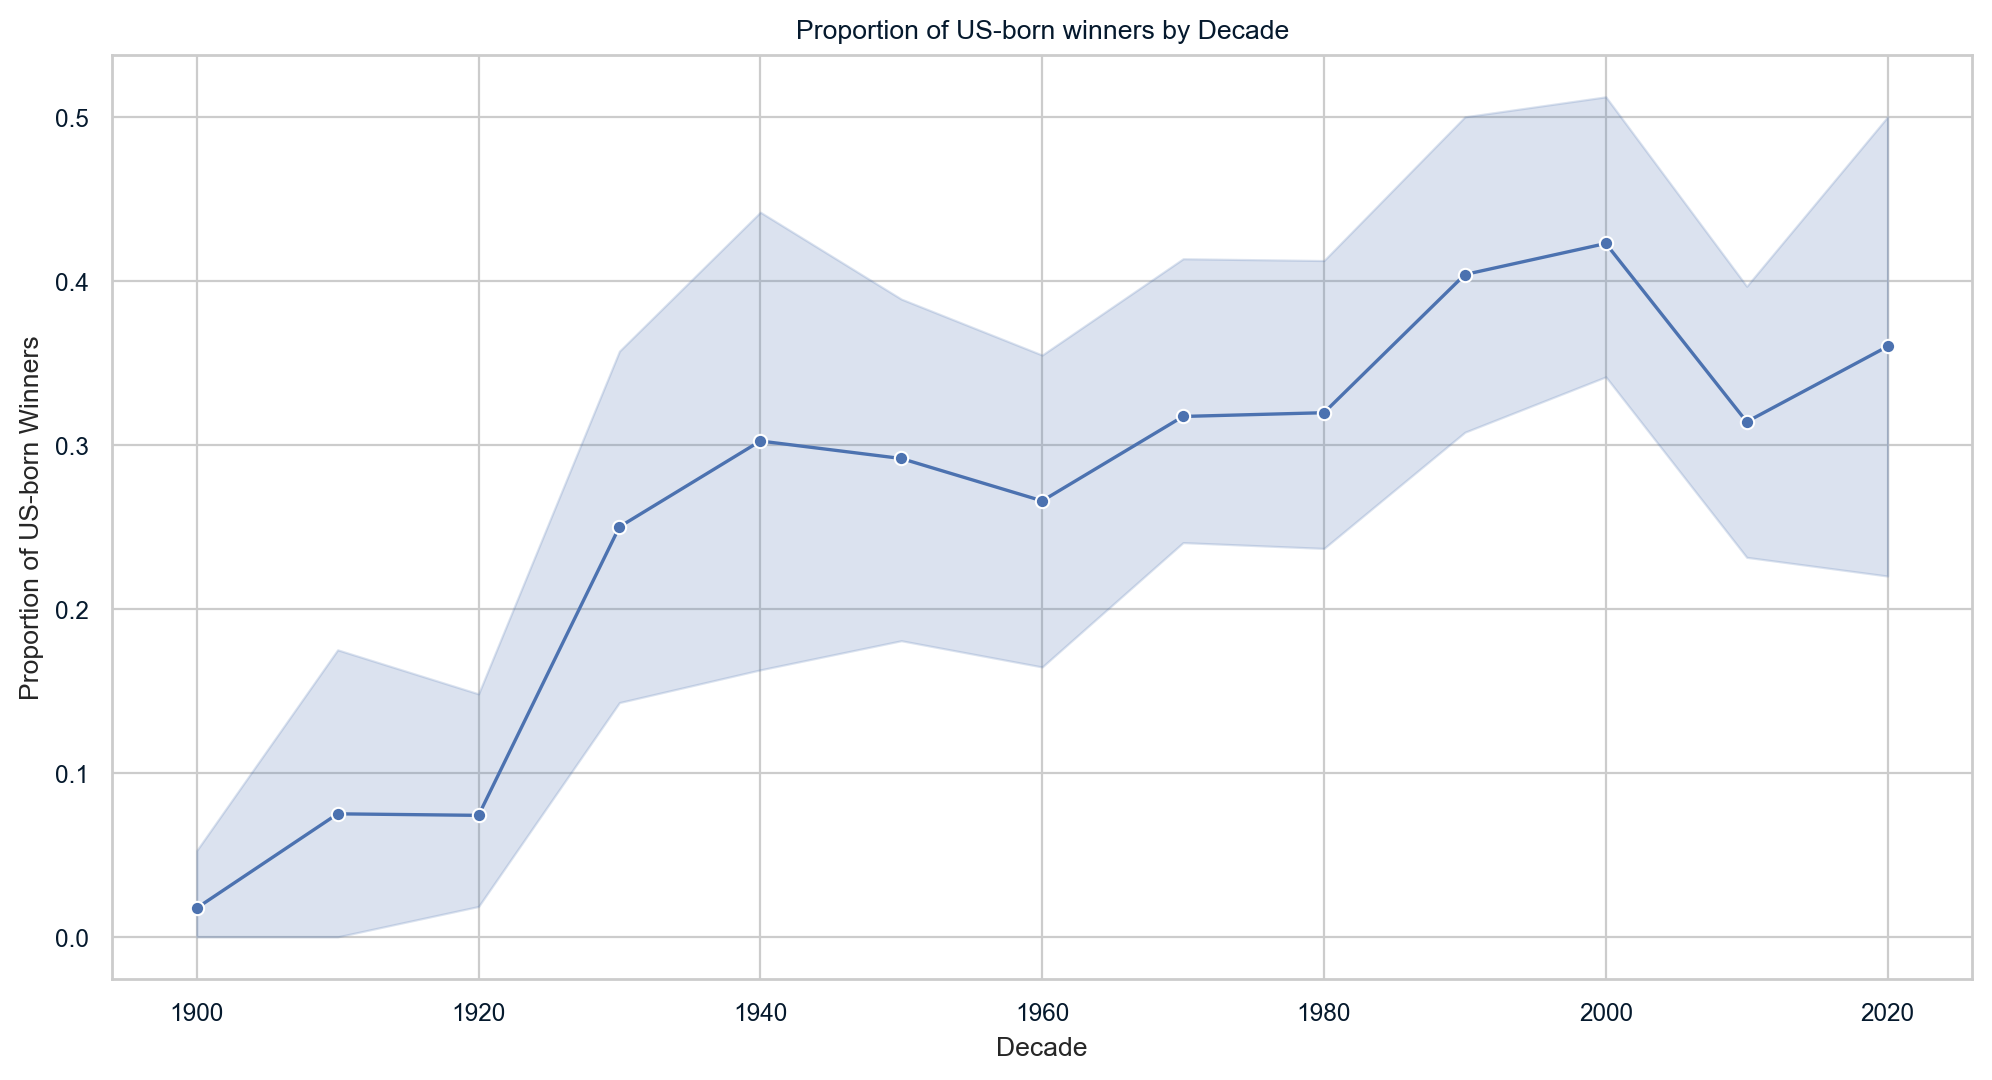

In [51]:
# Set the style and context of the plot
sns.set(style="whitegrid", context="paper")

# Set the figure size of the plot
plt.figure(figsize=(12, 6))

# Create a relational line plot of the US-born winners by decade
sns.lineplot(x="decade", y="us_born_winners", data=df, palette="tab10", marker="o")

# Add title and labels
plt.title("Proportion of US-born winners by Decade")
plt.xlabel("Decade")
plt.ylabel("Proportion of US-born Winners")

# Show the plot
plt.show()

In [52]:
# Add a column to identify female winners
df["female_winners"] = df["sex"] == "Female"

# Find the female winners ratio by decade and category
female_ratio_by_decade_category = df.groupby(["decade", "category"])["female_winners"].mean()

# Identify the decade and category with the highest proportion of female winners
max_decade_category_female = female_ratio_by_decade_category.idxmax()

# Store the result as a dictionary
max_female_dict = {max_decade_category_female[0]: max_decade_category_female[1]}

print(max_female_dict)

{2020: 'Literature'}


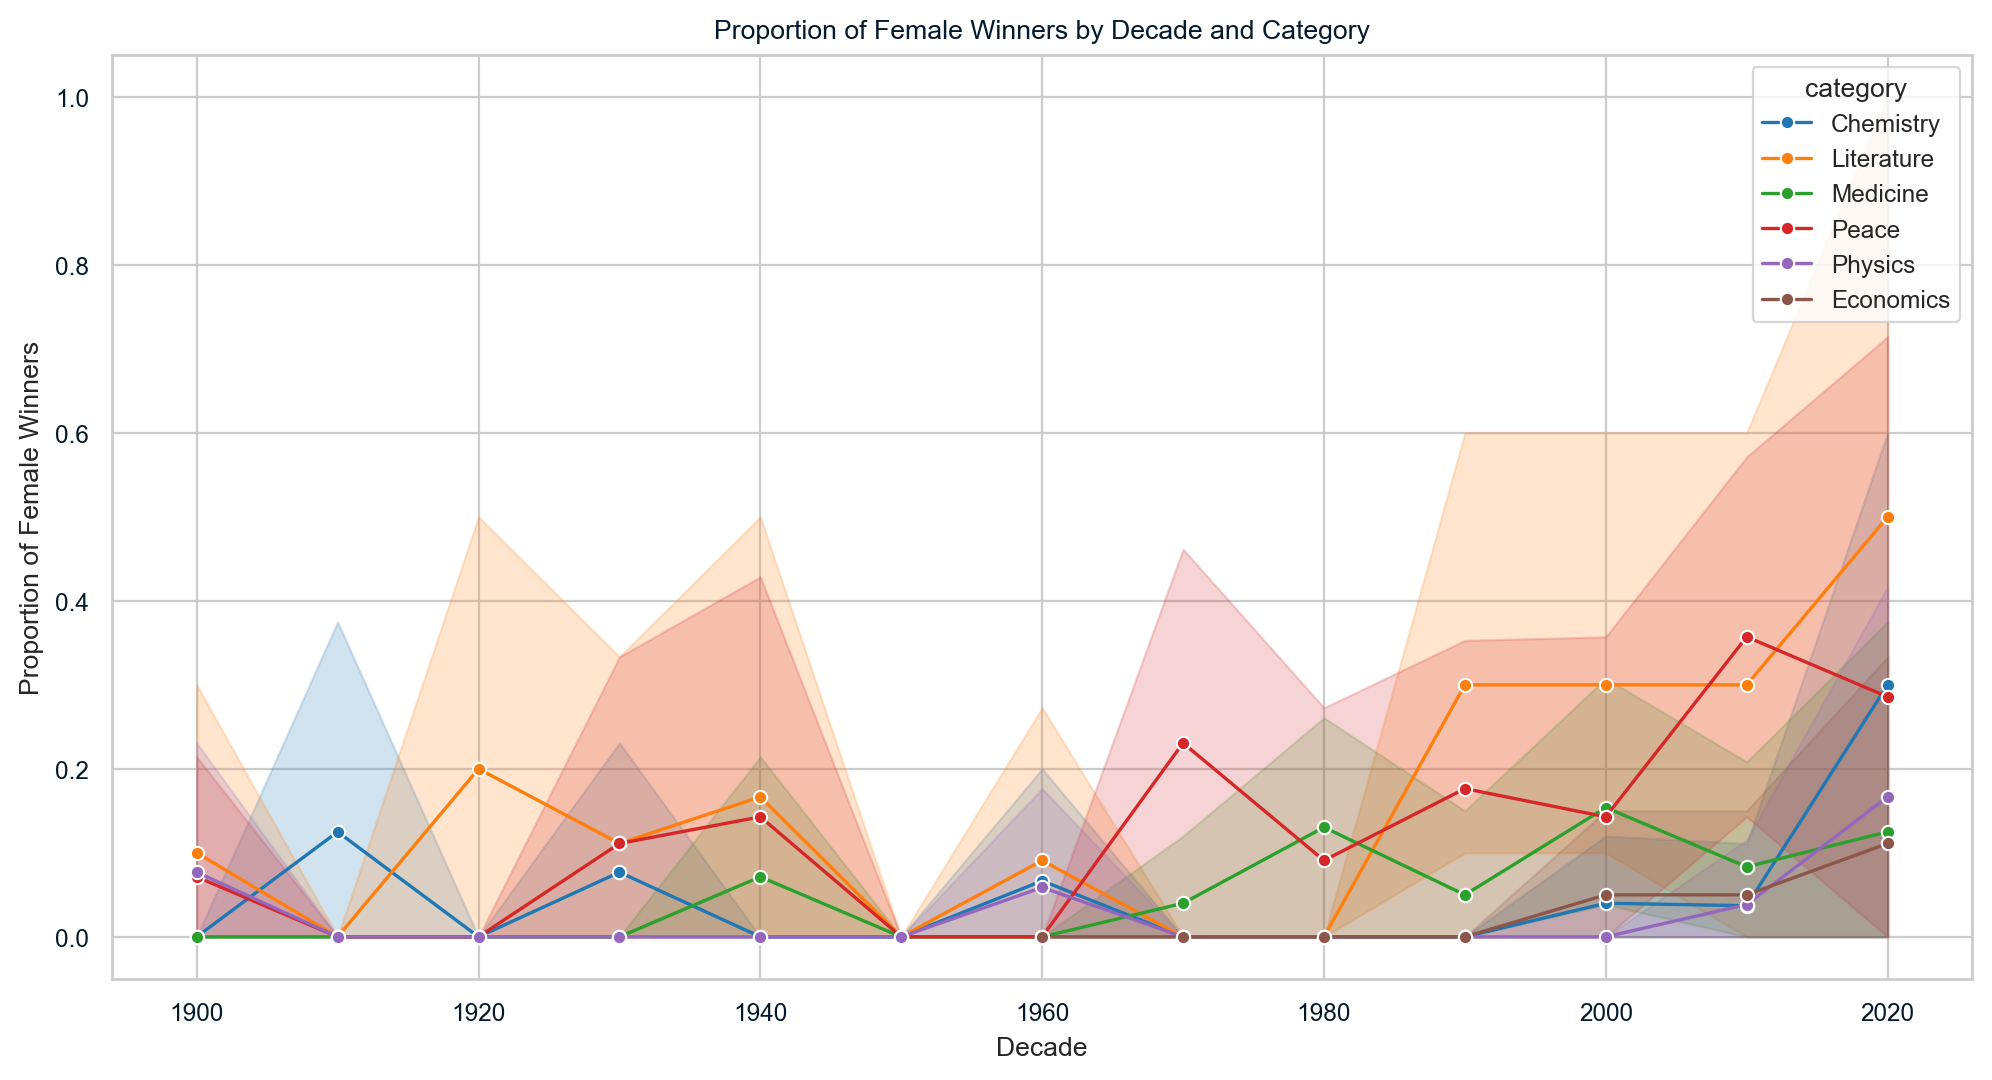

In [53]:
# Set the style and context of the plot
sns.set(style="whitegrid", context="paper")

# Set the figure size of the plot
plt.figure(figsize=(12, 6))

# Create a relational line plot of the female winners by decade and category
sns.lineplot(x="decade", y="female_winners", data=df, hue="category", palette="tab10", marker="o")

# Add title and labels
plt.title("Proportion of Female Winners by Decade and Category")
plt.xlabel("Decade")
plt.ylabel("Proportion of Female Winners")

# Show the plot
plt.show()

In [54]:
# Subset the dataframe with only female winners
female_winners_df = df[df["female_winners"]]

# Find the first female to receive a Nobel prize
first_female_winner = female_winners_df.sort_values("year").iloc[0]

# Extract the name of the first female winner
first_woman_name = first_female_winner["full_name"]

print(first_woman_name)

Marie Curie, née Sklodowska


In [55]:
# Extract the category of the first female winner
first_woman_category = first_female_winner["category"]

print(first_woman_category)

Physics


In [56]:
# Count the number of times each winner has won
winner_count = df["full_name"].value_counts()

# Extract the list of repeat winners
repeat_list = list(winner_count[winner_count >= 2].index)

print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


[MIT License](https://github.com/vzamboulingame/data-portfolio/blob/main/LICENSE)

Copyright © Vinodh Zamboulingame